In [1]:
import sys
sys.path.append("../")

In [2]:
import lib.utils as utils
import numpy as np
import tensorflow as tf

In [3]:
#psnr, ssim and nrmse
valid_custom_metrics = utils.CustomMetric()

7it [00:00, 223.14it/s]


Loaded 8 samples


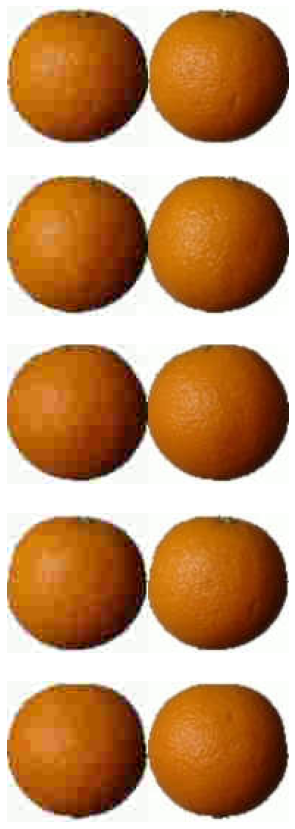

In [4]:
#Loading the training dataset
train_x, train_y = utils.load_dataset("../../dataset/train",  limit=8, f2c=True)

print("Loaded",train_x.shape[0], "samples")

#check the five firts samples   
utils.show_samples(train_x, train_y, begin=0, end=5, f2c=True)

In [5]:
#psnr, ssim and nrmse
valid_custom_metrics = utils.CustomMetric()

In [6]:
len(train_x)

8

In [7]:
valid_custom_metrics.feed(train_y, train_x)

../lib/utils.py:30: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  compare_psnr(batch_y[index], predictions[index], data_range=255)), axis=None)
../lib/utils.py:32: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  compare_ssim(batch_y[index], predictions[index], multichannel=True)), axis=None)
../lib/utils.py:34: UserWarning: DEPRECATED: skimage.measure.compare_nrmse has been moved to skimage.metrics.normalized_root_mse. It will be removed from skimage.measure in version 0.18.
  compare_nrmse(batch_y[index], predictions[index])), axis=None)


In [37]:
psnr, ssim, nrmse = valid_custom_metrics.result()

In [38]:
tensor_x = tf.convert_to_tensor(train_x)
tensor_y = tf.convert_to_tensor(train_y)

In [39]:
valid_custom_metrics.buffer_psnr

array([31.21655988, 31.29802522, 31.3069134 , 31.22561586, 31.23172891,
       31.29859201, 31.31443005, 31.34334358])

In [40]:
tf.image.psnr(tensor_y, tensor_x, 255, name=None)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([31.216558, 31.298025, 31.306913, 31.225615, 31.231728, 31.298592,
       31.314428, 31.343344], dtype=float32)>

In [41]:
valid_custom_metrics.buffer_ssim

array([0.8135775 , 0.81709239, 0.82432136, 0.81693462, 0.81711398,
       0.82608884, 0.82292895, 0.82857472])

In [119]:
tf.image.ssim(tensor_y, tensor_x, max_val=0.9813)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([0.81357735, 0.81733274, 0.8206851 , 0.8147442 , 0.8137762 ,
       0.82216054, 0.82001734, 0.8293709 ], dtype=float32)>

In [94]:
def nrmse(y_true, y_pred):
    return tf.math.sqrt(tf.math.reduce_mean(tf.math.square(tf.math.subtract(y_pred,y_true)),axis=[1,2,3]))

In [95]:
valid_custom_metrics.buffer_nrmse

array([0.80041304, 0.80050714, 0.80047322, 0.8003122 , 0.80033675,
       0.80059748, 0.79999117, 0.80056699])

In [96]:
nrmse(tensor_y, tensor_x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([7.009906 , 6.9444666, 6.9373646, 7.0026007, 6.997675 , 6.9440136,
       6.9313636, 6.908329 ], dtype=float32)>